## Decision Trees, Decision Boundaries, and Evaluation, Regression Tree
------------------------
A decision tree is a type of non-parametric supervised learning that can be used for both regression and classification. In this notebook we explore classification decision trees on an artificial dataset.  

Decision Trees are a type of Supervised Machine Learning where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves. The leaves are the decisions or the final outcomes. And the decision nodes are where the data is split.  

While making decision tree, at each node of tree we ask different type of questions. Based on the asked question we will calculate the information gain corresponding to it.Information gain is used to decide which feature to split on at each step in building the tree. Simplicity is best, so we want to keep our tree small. To do so, at each step we should choose the split that results in the purest daughter nodes. A commonly used measure of purity is called information. For each node of the tree, the information value measures how much information a feature gives us about the class. The split with the highest information gain will be taken as the first split and the process will continue until all children nodes are pure, or until the information gain is 0.  

##### Gini Impurity
First let’s understand the meaning of Pure and Impure.
Pure means, in a selected sample of dataset all data belongs to same class.
Impure means, data is mixture of different classes.
Gini Impurity is a measurement of the likelihood of an incorrect classification of a new instance of a random variable, if that new instance were randomly classified according to the distribution of class labels from the data set.
If our dataset is Pure then likelihood of incorrect classification is 0. If our sample is mixture of different classes then likelihood of incorrect classification will be high.

##### Steps for Making decision tree
1. Get list of rows (dataset) which are taken into consideration for making decision tree (recursively at each nodes).
2. Calculate uncertanity of our dataset or Gini impurity or how much our data is mixed up etc.
3. Generate list of all question which needs to be asked at that node.
4. Partition rows into True rows and False rows based on each question asked.
5. Calculate information gain based on gini impurity and partition of data from previous step.
6. Update highest information gain based on each question asked.
7. Update best question based on information gain (higher information gain).
8. Divide the node on best question. Repeat again from step 1 again until we get pure node (leaf nodes).  

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png" width="500"/> 


---------------------
### In Class Example
---------------------

We want to classify two classes in the dataset by using tree.

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

#### Dataset information
The dataset we will use is [make_moons dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) from sklearn.
We will make two interleaving half circles, and so two classes and 100 observations.

-----

Import libraries and dataset from sklearn and plot the data.

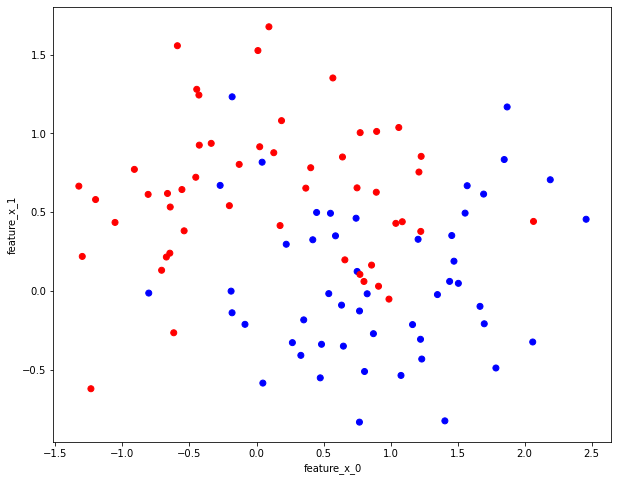

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


#The artificial data will be taken fro sklearn (make_moons)
from sklearn.datasets import make_moons

# X,y = make_moons(noise=0.01, random_state=3)
X,y = make_moons(noise=0.40, random_state=3)
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.show()


We split the data into training and test sets, and plot the training data

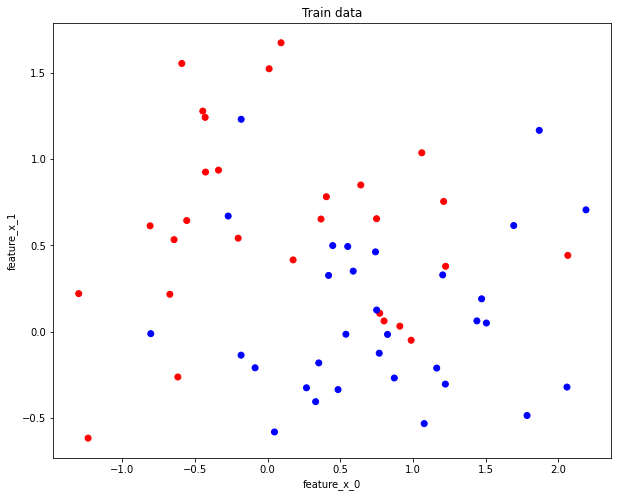

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c = c_train)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title('Train data')
plt.show()

Make lists for features and labels

In [3]:
features = ["x_0,","x_1"]
labels = ["red","blue"]

---

We will use the DecisionTreeClassifier from sklearn.Documentation can be found at **[tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

---

setup decision tree parameter (depth) and fit in training data and train.

In [4]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

#### Visualize the tree
we can see the spliting condition of each node

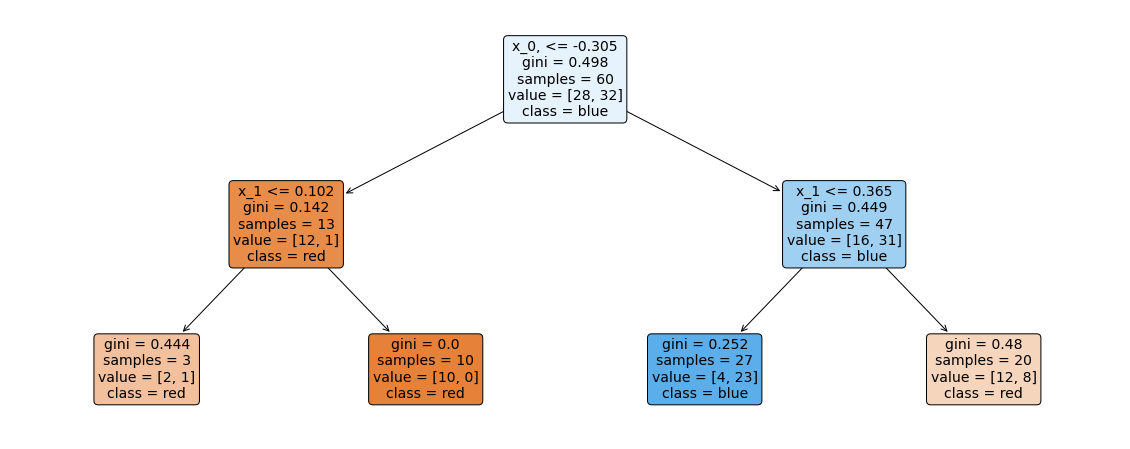

In [5]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

We again see the spliting rules for each node

In [6]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- x_0, <= -0.30
|   |--- x_1 <= 0.10
|   |   |--- class: 0
|   |--- x_1 >  0.10
|   |   |--- class: 0
|--- x_0, >  -0.30
|   |--- x_1 <= 0.36
|   |   |--- class: 1
|   |--- x_1 >  0.36
|   |   |--- class: 0



---

In the following code cell we show the decision boundaries from our trained tree. The large background colors is the region belong to a class and each point will also has a color that indicates the class it got assigned.


---

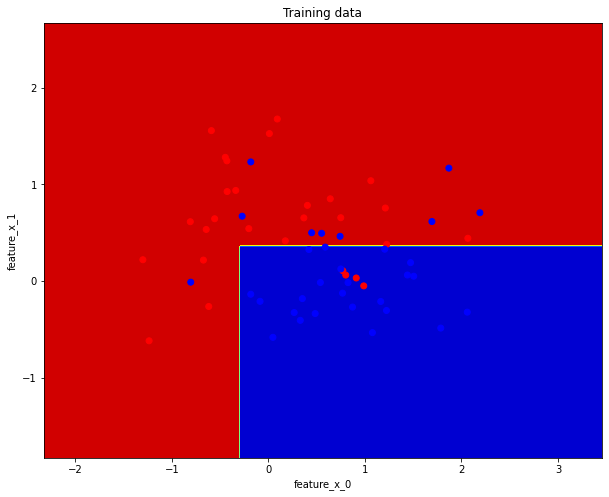

In [7]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_train[:,0],X_train[:,1],c = c_train)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Training data")
plt.show()


We can see some points are missclassified.

---

## The Confusion Matrix.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In many instances we are interested in the following:
 * true positives -> predicted true and actually true
 * false positives -> predicted true and not actually true
 * false negative -> predicted false but actually true
 * true negative -> predicted false and actually false
 
All of these possibilities are contained in the confusion matrix.

---

We will plot the confusion matrix here.

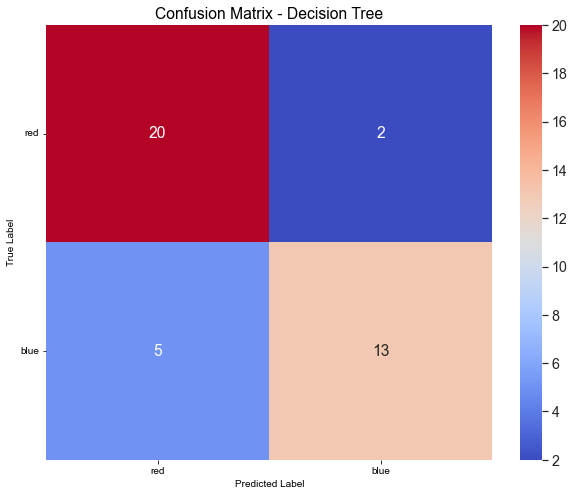

In [8]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#import metrics from sklearn
from sklearn import metrics

#Note: visualizing your tree above will be wired after running seaborn
import seaborn as sns


# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

#Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot = True,
           fmt = "g",
           ax = ax,
           cmap = "coolwarm") #cmap = "magma"

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels,rotation=0)
plt.show()


We can also use metrics from sklearn to import confusion matrix

In [9]:
print(metrics.confusion_matrix(y_test,test_pred_decision_tree))

[[20  2]
 [ 5 13]]


Now we try on test data

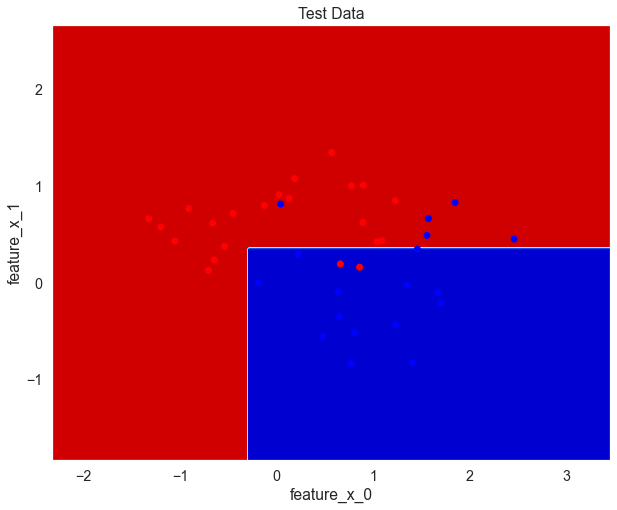

In [10]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_test[:,0],X_test[:,1],c = c_test)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Test Data")
plt.show()

Still missclassified some points

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:$\frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{\text{TP+TN}}{\text{TP+TN+FP+FN}}$  
Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

In [11]:
print(f"accuracy score = {metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score = 0.825


Precision tell us how many values we predicted to be in a certain class are actually in that class. Proportion of positive identifications was actually correct.Precision = $\frac{\text{TP}}{\text{TP+FP}}$

In [12]:
print(f"predicion score")
precision = metrics.precision_score(y_test,test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision,index=labels)
precision_results.rename(columns={0:"precision"},inplace=True)
precision_results

predicion score


,precision
red,0.800000
blue,0.866667


Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. Proportion of actual positives was identified correctly.   
Recall = $\frac{\text{TP}}{\text{TP+FN}}$ 

The F1 score is the harmonic mean of the precision and recall.  
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4179c69cf1dde8418c4593177521847e862e7df8" width="500"/>  


In [13]:
print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.87      0.72      0.79        18

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



-------------------------------
### Implementation on Different Dataset
---------------------

#### Dataset Information
The dataset we will use is [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) from sklearn dataset.
We will make generate isotropic gaussian blobs for clustering.


###### Our goal is to classify two classes in the dataset by using tree.

The libraries we will be using are:
* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [numpy](https://numpy.org/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)

Import libraries and data and plot the data see how three classes distributed.

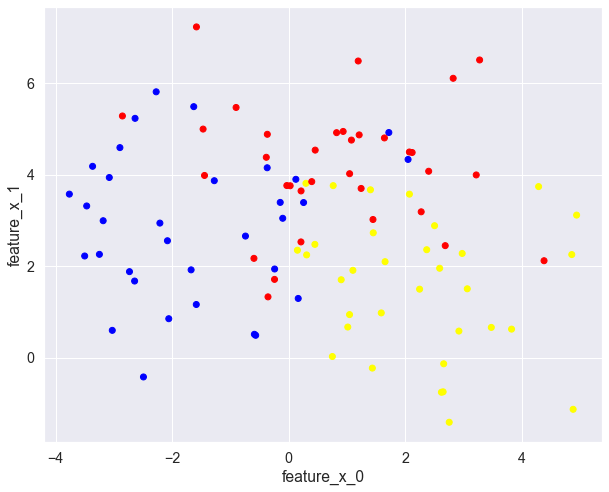

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=1.5,random_state=0)
colors = ["red" if label == 0 else ("yellow" if label == 1 else "blue") for label in y]

plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = colors)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.show()


split the data into training and test sets, and plot the training data

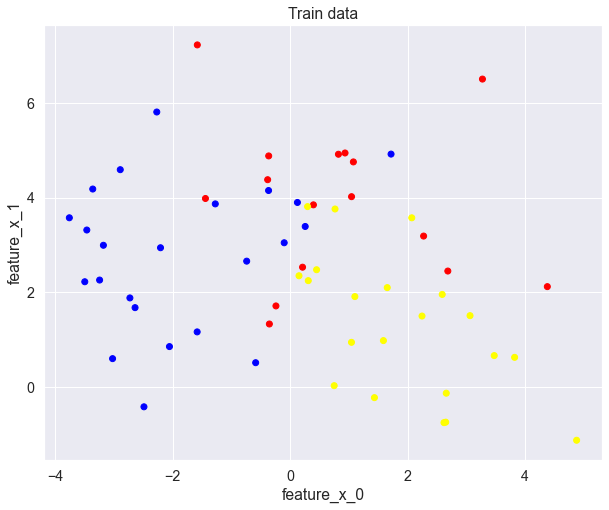

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

c_train = ["red" if label == 0 else ("yellow" if label == 1 else "blue") for label in y_train]
c_test = ["red" if label == 0 else ("yellow" if label == 1 else "blue") for label in y_test]

plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c = c_train)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title('Train data')
plt.show()

Make lists for features and labels

In [16]:
features = ["x_0,","x_1"]
labels = ["red","yellow","blue"]

---

We will use the DecisionTreeClassifier from sklearn.Documentation can be found at **[tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

---

setup decision tree parameter (depth = 3) and fit in training data and train.

In [17]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3,random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Visualize the tree we can see the spliting condition of each node

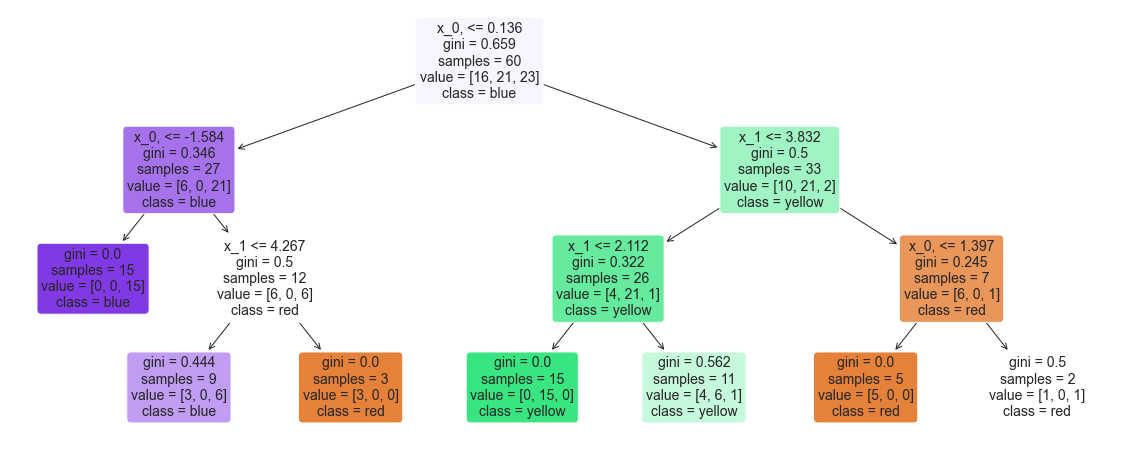

In [18]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)
plt.show()

We again see the spliting rules for each node

In [19]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                        feature_names = features)
print(tree_rules)

|--- x_0, <= 0.14
|   |--- x_0, <= -1.58
|   |   |--- class: 2
|   |--- x_0, >  -1.58
|   |   |--- x_1 <= 4.27
|   |   |   |--- class: 2
|   |   |--- x_1 >  4.27
|   |   |   |--- class: 0
|--- x_0, >  0.14
|   |--- x_1 <= 3.83
|   |   |--- x_1 <= 2.11
|   |   |   |--- class: 1
|   |   |--- x_1 >  2.11
|   |   |   |--- class: 1
|   |--- x_1 >  3.83
|   |   |--- x_0, <= 1.40
|   |   |   |--- class: 0
|   |   |--- x_0, >  1.40
|   |   |   |--- class: 0



---

In the following code cell we show the decision boundaries from our trained tree. The large background colors is the region belong to a class and each point will also has a color that indicates the class it got assigned.


---

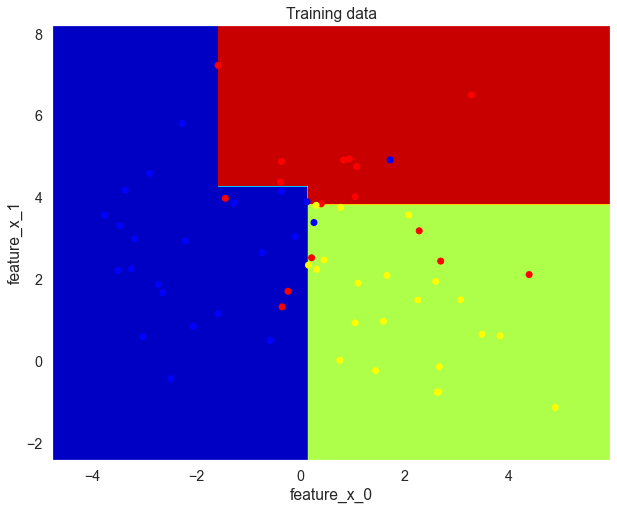

In [20]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_train[:,0],X_train[:,1],c = c_train)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Training data")
plt.show()


See some misclassified points

Next we plot the confusion matrix.

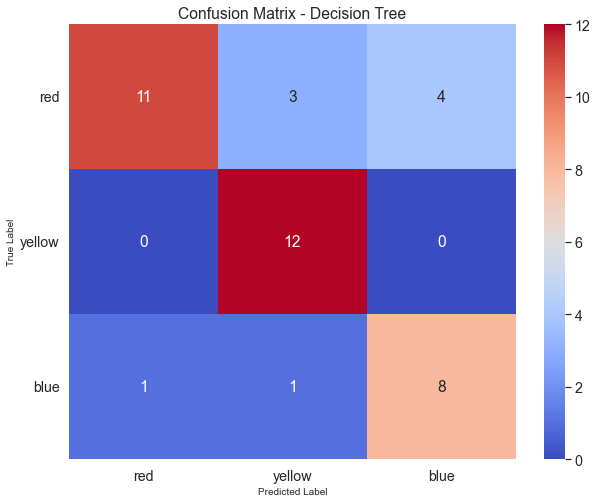

In [21]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#import metrics from sklearn
from sklearn import metrics

#Note: visualizing your tree above will be wired after running seaborn
import seaborn as sns


# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

#Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot = True,
           fmt = "g",
           ax = ax,
           cmap = "coolwarm") #cmap = "magma"

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels,rotation=0)
plt.show()


See true red points were misclassified the most (7 points total)

Now we try on test data

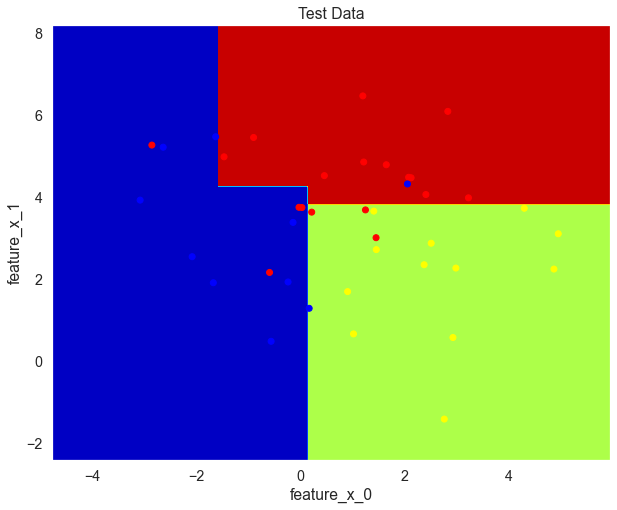

In [22]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_test[:,0],X_test[:,1],c = c_test)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Test Data")
plt.show()

Calculate accuracy score

In [23]:
print(f"accuracy score = {metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score = 0.775


not too well

Precision score

In [24]:
print(f"predicion score")
precision = metrics.precision_score(y_test,test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision,index=labels)
precision_results.rename(columns={0:"precision"},inplace=True)
precision_results

predicion score


,precision
red,0.916667
yellow,0.750000
blue,0.666667


Did great job on red

In [25]:
print(metrics.classification_report(y_test,test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.75      1.00      0.86        12
           2       0.67      0.80      0.73        10

    accuracy                           0.78        40
   macro avg       0.78      0.80      0.77        40
weighted avg       0.80      0.78      0.77        40



#### Decrease depth and see what happen

In [26]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=2,random_state=42)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Confusion matrix on test data

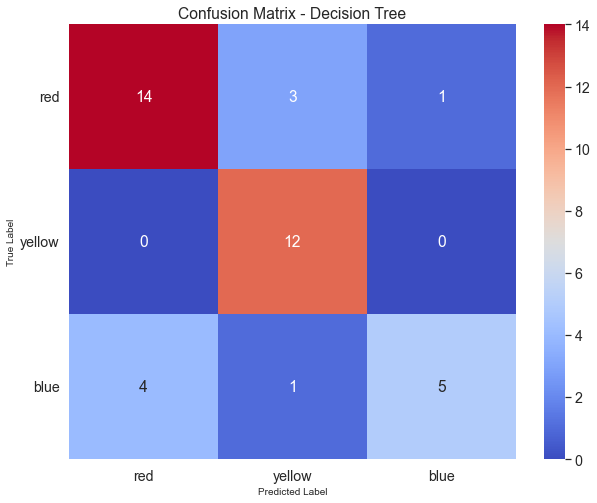

In [27]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

#import metrics from sklearn
from sklearn import metrics

#Note: visualizing your tree above will be wired after running seaborn
import seaborn as sns


# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,test_pred_decision_tree)

#Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10,8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
           annot = True,
           fmt = "g",
           ax = ax,
           cmap = "coolwarm") #cmap = "magma"

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=10)
ax.set_yticklabels(labels,rotation=0)
plt.show()

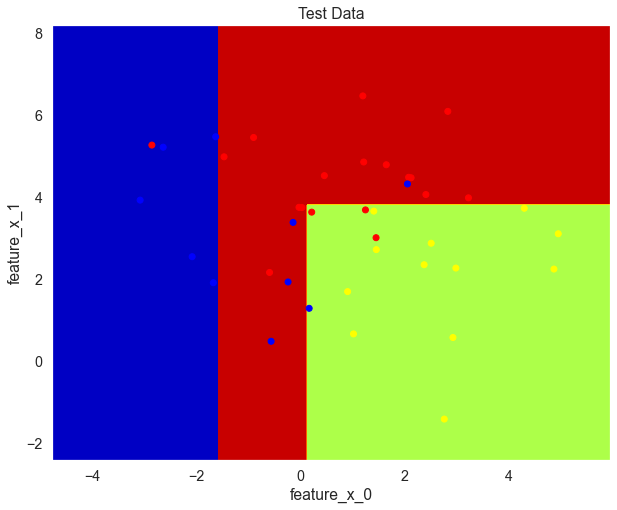

In [28]:
#Set a plot_step
plot_step = 0.02

plt.figure(figsize=(10,8))

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                     np.arange(y_min,y_max,plot_step))

Z = decision_tree.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx,yy,Z,cmap="jet_r")

plt.scatter(X_test[:,0],X_test[:,1],c = c_test)
plt.xlabel("feature_x_0")
plt.ylabel("feature_x_1")
plt.title("Test Data")
plt.show()

In [29]:
print(f"accuracy score = {metrics.accuracy_score(y_test,test_pred_decision_tree)}")

accuracy score = 0.775


In [30]:
print(f"predicion score")
precision = metrics.precision_score(y_test,test_pred_decision_tree,
                                   average=None)
precision_results = pd.DataFrame(precision,index=labels)
precision_results.rename(columns={0:"precision"},inplace=True)
precision_results

predicion score


,precision
red,0.777778
yellow,0.750000
blue,0.833333


Now blue performs the best

#### Conclusion  
The overall test accuracy may not increase when we increase the depth. Some class' accuracy will increase and some will decrease.

### Decision Tree for Regression
----------------------------
Decision Trees are also capable of performing regression tasks. The main difference is that instead of predicting a class in each node, it predicts a value. Instead of using Gini index, rgression tree will use mean square error as a metric to decide how to split the next root.

#### Dataset Information
We will generate quadratic training set plus noise.

In [2]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 3 * (X - 0.3) ** 2
noise = np.random.randn(m, 1) / 10
y = y + noise

Visaulize the data

Text(0.5, 1.0, 'Quadratic + Noise')

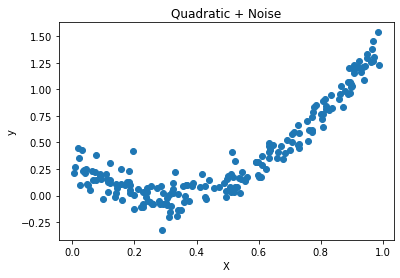

In [4]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Quadratic + Noise')

Split the data into training and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

---

We will use the DecisionTreeClassifier from sklearn.Documentation can be found at **[tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

---

Use DecisionTreeRegressor for the regression tree. Setup decision tree parameter (depth) and fit in training data and train.

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

#### Visualize the tree
we can see the spliting condition of each node

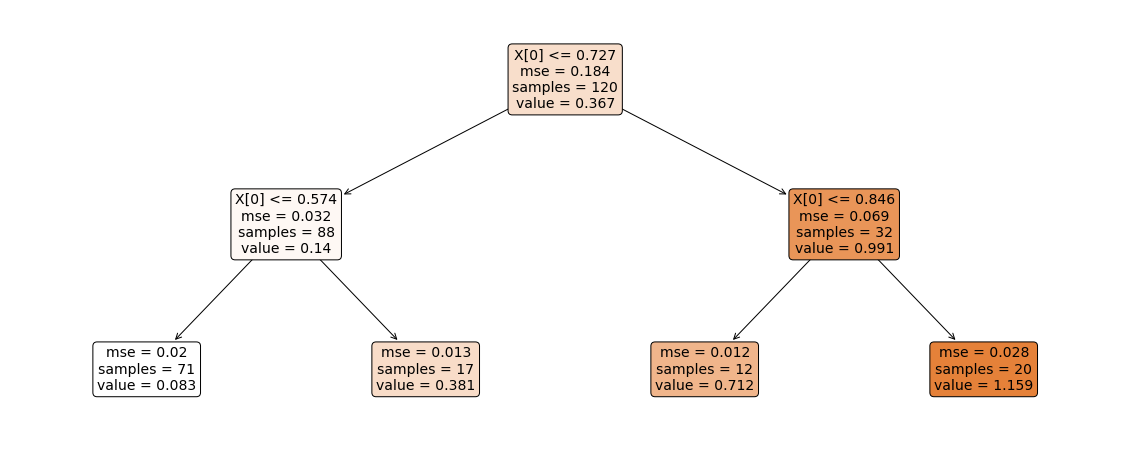

In [12]:
from sklearn import tree

plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

We can see the MSE keep decreasing when the leaves increase

We again see the spliting rules for each node

In [13]:
from sklearn.tree import export_text

tree_rules = export_text(tree_reg,
                        feature_names = None)
print(tree_rules)

|--- feature_0 <= 0.73
|   |--- feature_0 <= 0.57
|   |   |--- value: [0.08]
|   |--- feature_0 >  0.57
|   |   |--- value: [0.38]
|--- feature_0 >  0.73
|   |--- feature_0 <= 0.85
|   |   |--- value: [0.71]
|   |--- feature_0 >  0.85
|   |   |--- value: [1.16]



See how it performs on the test set

In [15]:
pred = tree_reg.predict(X_test)

Calculate RMSE for the test result by using [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) from sklearn

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred, squared=False)

0.13559810193195684

RMSE = 0.13559810193195684

Lets visualize the prediction vs true

Text(0.5, 1.0, 'Prediction (red) vs True (blue)')

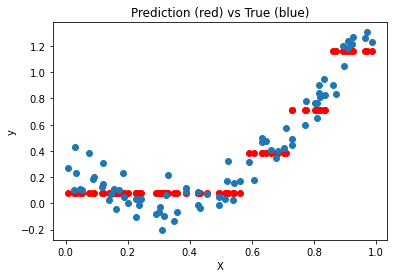

In [21]:
plt.scatter(X_test,pred,c='red')
plt.scatter(X_test,y_test)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Prediction (red) vs True (blue)')

Let's see what happen if we increase the depth

In [22]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

#### Visualize the tree

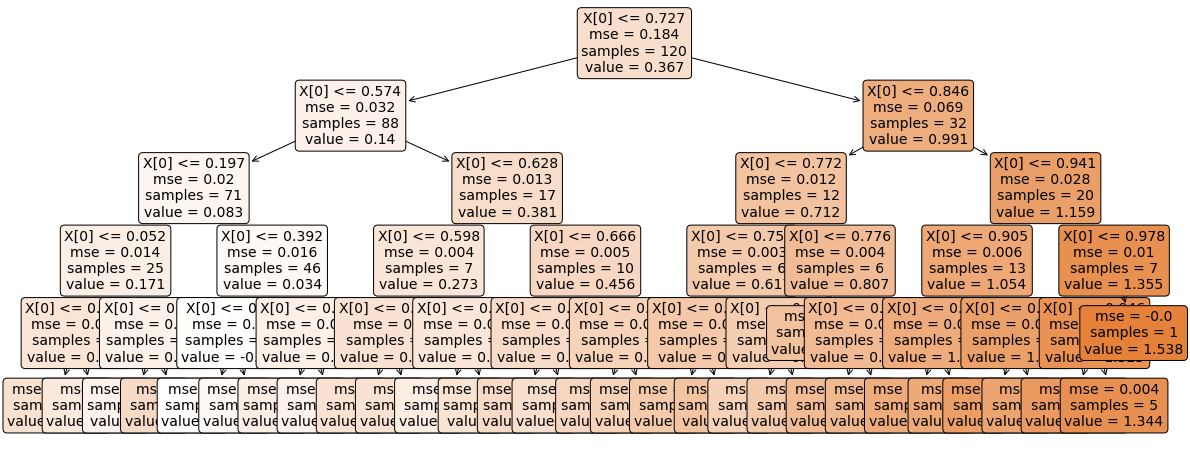

In [23]:
plt.figure(figsize=(20,8))
a = tree.plot_tree(tree_reg,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

We can see MSE become super small at the bottom leaves

See how it performs on the test set

In [26]:
pred = tree_reg.predict(X_test)
mean_squared_error(y_test, pred, squared=False)

0.11579190937807914

RMSE = 0.11579190937807914

Visualize the prediction and true values

Text(0.5, 1.0, 'Prediction (red) vs True (blue)')

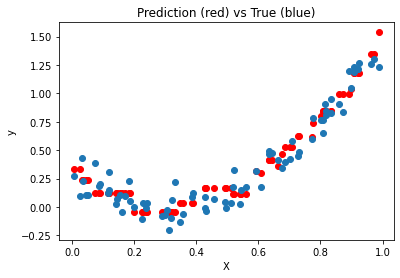

In [27]:
plt.scatter(X_test,pred,c='red')
plt.scatter(X_test,y_test)
plt.xlabel("X")
plt.ylabel("y")
plt.title('Prediction (red) vs True (blue)')

We can see the prediction become more curvy here compare to the depth = 2.

#### Conclusion  
For tree regression, the standard it uses to decide how to split the nodes is MSE, and the deeper the tree, the more complex the tree and need to be careful of overfitting.

#### References
K means clustering: K means clustering algorithm in machine learning. Analytics Vidhya. (2021, January 22). Retrieved November 11, 2021, from https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/. 

Jaadi, Z. (n.d.). A step-by-step explanation of principal component analysis (PCA). Built In. Retrieved November 11, 2021, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis. 